In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

%cd ../..

!hostname

/p/fastdata/pli/Private/oberstrass1/datasets/vervet1818-3d
jrc0188


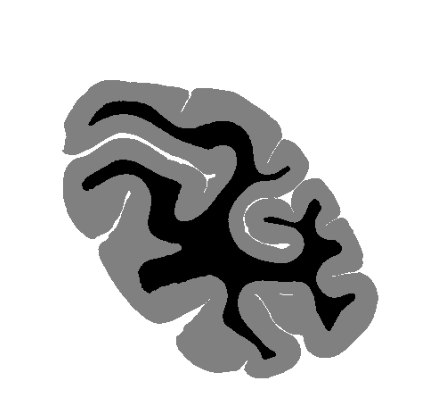

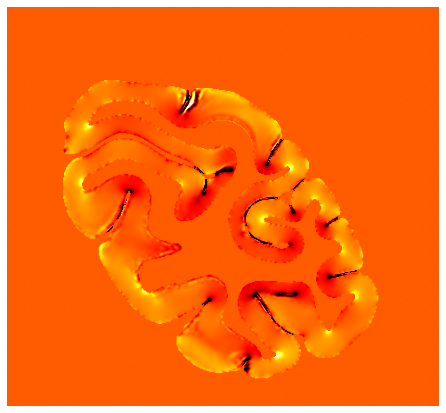

In [2]:
# Load quantity of interest and the cortex segmentation volume

target_file = "data/aa/volume/brain_visa/divergence_6.nii.gz"
cortex_file = "data/aa/volume/cortex/cortex_6.h5"

###

from vervet1818_3d.correlation.functions import load_data
import pli.image as im

target_volume, target_spacing, cortex_volume, cortex_spacing = load_data(
    target_file,
    cortex_file
)

im.show(cortex_volume[:, 50, :])
im.show(target_volume[:, 50, :], scale=False, vmin=-0.3, vmax=0.3, cmap='hot')

100%|██████████| 117/117 [01:33<00:00,  1.25it/s]


Scale
Fit
Train & Train:
R² train: 0.541


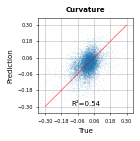

Train & Test:
R² test: -59.2


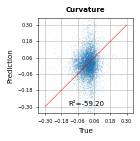

Test & Test:
Scale
Fit
R² tes testt: 0.469


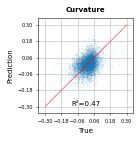

100%|██████████| 234/234 [00:03<00:00, 71.84it/s]


Scale
Fit
Train & Train:
R² train: 0.0461


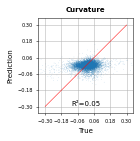

Train & Test:
R² test: 0.0278


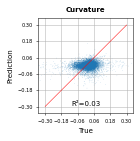

Test & Test:
Scale
Fit
R² tes testt: 0.0479


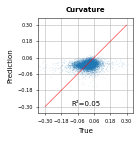

100%|██████████| 137/137 [00:28<00:00,  4.73it/s]


Scale
Fit
Train & Train:
R² train: 0.0666


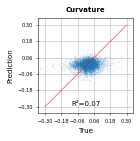

Train & Test:
R² test: -2.71e+07


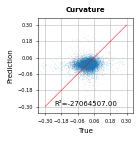

Test & Test:
Scale
Fit
R² tes testt: 0.07


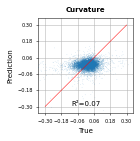

100%|██████████| 117/117 [00:23<00:00,  4.91it/s]


Scale
Fit
Train & Train:
R² train: 0.168


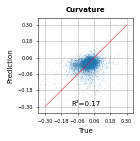

Train & Test:
R² test: 0.00548


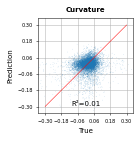

Test & Test:
Scale
Fit
R² tes testt: 0.118


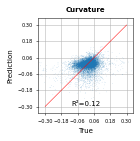

100%|██████████| 117/117 [00:22<00:00,  5.15it/s]


Scale
Fit
Train & Train:
R² train: 0.269


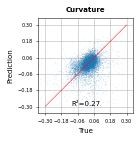

Train & Test:
R² test: -0.0191


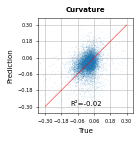

Test & Test:
Scale
Fit
R² tes testt: 0.18


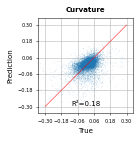

100%|██████████| 117/117 [00:22<00:00,  5.20it/s]


Scale
Fit
Train & Train:
R² train: 0.283


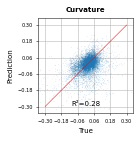

Train & Test:
R² test: -0.0322


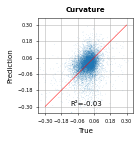

Test & Test:
Scale
Fit
R² tes testt: 0.171


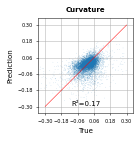

100%|██████████| 117/117 [00:27<00:00,  4.22it/s]


Scale
Fit
Train & Train:
R² train: 0.299


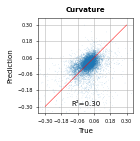

Train & Test:
R² test: 0.037


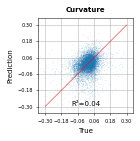

Test & Test:
Scale
Fit
R² tes testt: 0.192


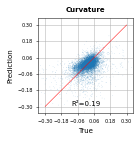

100%|██████████| 117/117 [00:23<00:00,  4.90it/s]


Scale
Fit
Train & Train:
R² train: 0.289


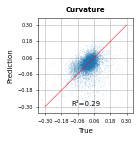

Train & Test:
R² test: 0.0231


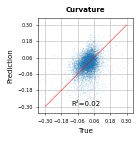

Test & Test:
Scale
Fit
R² tes testt: 0.207


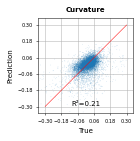

100%|██████████| 117/117 [00:23<00:00,  4.96it/s]


Scale
Fit
Train & Train:
R² train: 0.287


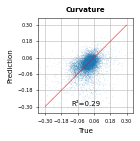

Train & Test:
R² test: 0.0162


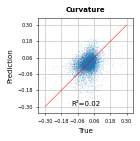

Test & Test:
Scale
Fit
R² tes testt: 0.198


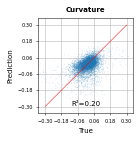

In [3]:
# Load feature maps and setup dictionary of section IDs as keys, starting at zero_section

title = "Curvature"
name = "curvature"

# Define features
features_path = "data/aa/features/"

models = [
    "simclr-imagenet",
    "pli_glcm",
    "pli_sobel_histo",
    "resnet50_planes8_962-1083_same",
    "resnet50_planes8_962-1083_circle_small",
    "resnet50_planes8_962-1083_circle",
    "resnet50_planes8_962-1083_neighbor",
    "resnet50_planes8_962-1083_sphere_small",
    "resnet50_planes8_962-1083_sphere",
]

feature_groups = [
    "Features/2048",
    "Features/36",
    "Features/252",
    "Features/256",
    "Features/256",
    "Features/256",
    "Features/256",
    "Features/256",
    "Features/256",
]

# Define Train/Test split
zero_section = 841
min_ix = 30
split_ix = 120
max_ix=  210

# Define training data
GM_CLASS = 2

train_count = 10_000
test_count = 10_000

seed = 299_792_458

# Visualization
target_range = (-0.3, 0.3)
vis_range = (-0.35, 0.35)

subsample = 10_000

###

from vervet1818_3d.correlation.functions import load_features, aggregate_data, linear_evaluation
import os
import matplotlib.pyplot as plt

# Set the global font size

results = {}

for model, feature_group in zip(models, feature_groups):

    feature_dir = os.path.join(features_path, model)

    feature_maps = load_features(
        feature_dir,
        feature_group,
        zero_section,
        cortex_volume
    )

    test_indices = sorted([f for f in feature_maps.keys() if min_ix <= f < split_ix])
    train_indices = sorted([f for f in feature_maps.keys() if max_ix > f >= split_ix])

    train_features, train_target = aggregate_data(train_indices, train_count, seed, cortex_volume, feature_maps, target_volume, GM_CLASS)
    test_features, test_target = aggregate_data(test_indices, test_count, seed, cortex_volume, feature_maps, target_volume, GM_CLASS)

    r = linear_evaluation(
        train_features,
        train_target,
        test_features,
        test_target,
        target_range,
        vis_range,
        name,
        model,
        title,
        subsample,
    )

    results[model] = r

In [4]:
print("| Method | Train/Train R2\t| Train/Test R2\t| Test/Test R2\t|")
print("| --- | --- | --- | --- |")

for k in results.keys():
    print(f"| {k}\t | {results[k]['train_train_r2']:.3g}\t| {results[k]['train_test_r2']:.3g} | {results[k]['test_test_r2']:.3g} |")

| Method | Train/Train R2	| Train/Test R2	| Test/Test R2	|
| --- | --- | --- | --- |
| simclr-imagenet	 | 0.541	| -59.2 | 0.469 |
| pli_glcm	 | 0.0461	| 0.0278 | 0.0479 |
| pli_sobel_histo	 | 0.0666	| -2.71e+07 | 0.07 |
| resnet50_planes8_962-1083_same	 | 0.168	| 0.00548 | 0.118 |
| resnet50_planes8_962-1083_circle_small	 | 0.269	| -0.0191 | 0.18 |
| resnet50_planes8_962-1083_circle	 | 0.283	| -0.0322 | 0.171 |
| resnet50_planes8_962-1083_neighbor	 | 0.299	| 0.037 | 0.192 |
| resnet50_planes8_962-1083_sphere_small	 | 0.289	| 0.0231 | 0.207 |
| resnet50_planes8_962-1083_sphere	 | 0.287	| 0.0162 | 0.198 |


With clip:

| Method | Train/Train R2	| Train/Test R2	| Test/Test R2	|
| --- | --- | --- | --- |
| simclr-imagenet	 | 0.305	| -0.741 | 0.287 |
| pli_glcm	 | 0.0461	| 0.0278 | 0.0467 |
| pli_sobel_histo	 | 0.0659	| -0.0491 | 0.0611 |
| resnet50_planes8_962-1083_same	 | 0.16	| 0.00675 | 0.118 |
| resnet50_planes8_962-1083_circle_small	 | 0.243	| -0.0111 | 0.178 |
| resnet50_planes8_962-1083_circle	 | 0.248	| -0.0273 | 0.171 |
| resnet50_planes8_962-1083_neighbor	 | 0.26	| 0.039 | 0.191 |
| resnet50_planes8_962-1083_sphere_small	 | 0.267	| 0.0214 | 0.207 |
| resnet50_planes8_962-1083_sphere	 | 0.254	| 0.0169 | 0.198 |

Without clip:

| Method | Train/Train R2	| Train/Test R2	| Test/Test R2	|
| --- | --- | --- | --- |
| simclr-imagenet	 | 0.541	| -59.2 | 0.469 |
| pli_glcm	 | 0.0461	| 0.0278 | 0.0479 |
| pli_sobel_histo	 | 0.0666	| -2.71e+07 | 0.07 |
| resnet50_planes8_962-1083_same	 | 0.168	| 0.00548 | 0.118 |
| resnet50_planes8_962-1083_circle_small	 | 0.269	| -0.0191 | 0.18 |
| resnet50_planes8_962-1083_circle	 | 0.283	| -0.0322 | 0.171 |
| resnet50_planes8_962-1083_neighbor	 | 0.299	| 0.037 | 0.192 |
| resnet50_planes8_962-1083_sphere_small	 | 0.289	| 0.0231 | 0.207 |
| resnet50_planes8_962-1083_sphere	 | 0.287	| 0.0162 | 0.198 |